In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import Row
from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
sparksession = SparkSession.builder.appName("fligts_Analysis").getOrCreate()

In [3]:
airports = sparksession.read.format("CSV").option("header" , "true").load("airports.csv")

In [5]:
airports.printSchema()

root
 |-- IATA_CODE: string (nullable = true)
 |-- AIRPORT: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTRY: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)



In [6]:
airports.show(5)

+---------+--------------------+-----------+-----+-------+--------+----------+
|IATA_CODE|             AIRPORT|       CITY|STATE|COUNTRY|LATITUDE| LONGITUDE|
+---------+--------------------+-----------+-----+-------+--------+----------+
|      ABE|Lehigh Valley Int...|  Allentown|   PA|    USA|40.65236| -75.44040|
|      ABI|Abilene Regional ...|    Abilene|   TX|    USA|32.41132| -99.68190|
|      ABQ|Albuquerque Inter...|Albuquerque|   NM|    USA|35.04022|-106.60919|
|      ABR|Aberdeen Regional...|   Aberdeen|   SD|    USA|45.44906| -98.42183|
|      ABY|Southwest Georgia...|     Albany|   GA|    USA|31.53552| -84.19447|
+---------+--------------------+-----------+-----+-------+--------+----------+
only showing top 5 rows



In [7]:
airports.count()

322

In [8]:
airlines = sparksession.read.format("CSV").option("header" , "true").load("airlines.csv")

In [9]:
airlines.printSchema()

root
 |-- IATA_CODE: string (nullable = true)
 |-- AIRLINE: string (nullable = true)



In [10]:
airlines.show(10)

+---------+--------------------+
|IATA_CODE|             AIRLINE|
+---------+--------------------+
|       UA|United Air Lines ...|
|       AA|American Airlines...|
|       US|     US Airways Inc.|
|       F9|Frontier Airlines...|
|       B6|     JetBlue Airways|
|       OO|Skywest Airlines ...|
|       AS|Alaska Airlines Inc.|
|       NK|    Spirit Air Lines|
|       WN|Southwest Airline...|
|       DL|Delta Air Lines Inc.|
+---------+--------------------+
only showing top 10 rows



In [11]:
flights = sparksession.read.format("CSV").option("header","true").load("flights.csv")

In [12]:
flights.printSchema()

root
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- DAY: string (nullable = true)
 |-- DAY_OF_WEEK: string (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: string (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: string (nullable = true)
 |-- DEPARTURE_TIME: string (nullable = true)
 |-- DEPARTURE_DELAY: string (nullable = true)
 |-- TAXI_OUT: string (nullable = true)
 |-- WHEELS_OFF: string (nullable = true)
 |-- SCHEDULED_TIME: string (nullable = true)
 |-- ELAPSED_TIME: string (nullable = true)
 |-- AIR_TIME: string (nullable = true)
 |-- DISTANCE: string (nullable = true)
 |-- WHEELS_ON: string (nullable = true)
 |-- TAXI_IN: string (nullable = true)
 |-- SCHEDULED_ARRIVAL: string (nullable = true)
 |-- ARRIVAL_TIME: string (nullable = true)
 |-- ARRIVAL_DELAY: string (nullable = true)
 |-- D

In [13]:
flights.show(5)

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [17]:
flightdetails = flights.select("YEAR","MONTH" ,"AIRLINE" ,"FLIGHT_NUMBER", "ORIGIN_AIRPORT","DESTINATION_AIRPORT" )

In [18]:
flightdetails.show(10)

+----+-----+-------+-------------+--------------+-------------------+
|YEAR|MONTH|AIRLINE|FLIGHT_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|
+----+-----+-------+-------------+--------------+-------------------+
|2015|    1|     AS|           98|           ANC|                SEA|
|2015|    1|     AA|         2336|           LAX|                PBI|
|2015|    1|     US|          840|           SFO|                CLT|
|2015|    1|     AA|          258|           LAX|                MIA|
|2015|    1|     AS|          135|           SEA|                ANC|
|2015|    1|     DL|          806|           SFO|                MSP|
|2015|    1|     NK|          612|           LAS|                MSP|
|2015|    1|     US|         2013|           LAX|                CLT|
|2015|    1|     AA|         1112|           SFO|                DFW|
|2015|    1|     DL|         1173|           LAS|                ATL|
+----+-----+-------+-------------+--------------+-------------------+
only showing top 10 

In [19]:
flightdetails
airlines
airports

DataFrame[IATA_CODE: string, AIRPORT: string, CITY: string, STATE: string, COUNTRY: string, LATITUDE: string, LONGITUDE: string]

In [20]:
flights_per_airlines = flightdetails.groupBy("AIRLINE").count()

In [21]:
flights_per_airlines.show()

+-------+-------+
|AIRLINE|  count|
+-------+-------+
|     UA| 515723|
|     NK| 117379|
|     AA| 725984|
|     EV| 571977|
|     B6| 267048|
|     DL| 875881|
|     OO| 588353|
|     F9|  90836|
|     US| 198715|
|     MQ| 294632|
|     HA|  76272|
|     AS| 172521|
|     VX|  61903|
|     WN|1261855|
+-------+-------+



In [24]:
pandas_df = flights_per_airlines.select("*").toPandas()
pandas_df

,AIRLINE,count
0,UA,515723
1,NK,117379
2,AA,725984
3,EV,571977
4,B6,267048
5,DL,875881
6,OO,588353
7,F9,90836
8,US,198715
9,MQ,294632


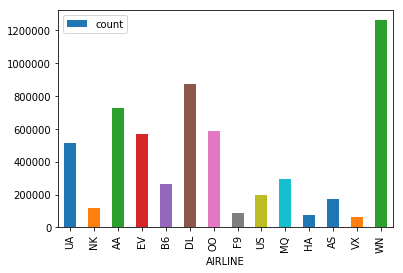

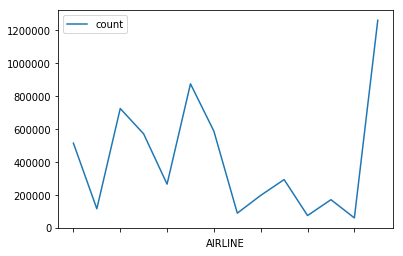

In [35]:
pandas_df.plot.bar(x ="AIRLINE" , y ="count")
pandas_df.plot.line(x ="AIRLINE" , y ="count")

flightdetails
airlines
airports

Create tables using sparkSQL to leverare sql possibilities

In [28]:
flightdetails.createOrReplaceTempView("flight_details")
airlines.createOrReplaceTempView("airlines_details")
airports.createOrReplaceTempView("airports_details")

In [30]:
sparksession.sql("SELECT * FROM flight_details").show()

+----+-----+-------+-------------+--------------+-------------------+
|YEAR|MONTH|AIRLINE|FLIGHT_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|
+----+-----+-------+-------------+--------------+-------------------+
|2015|    1|     AS|           98|           ANC|                SEA|
|2015|    1|     AA|         2336|           LAX|                PBI|
|2015|    1|     US|          840|           SFO|                CLT|
|2015|    1|     AA|          258|           LAX|                MIA|
|2015|    1|     AS|          135|           SEA|                ANC|
|2015|    1|     DL|          806|           SFO|                MSP|
|2015|    1|     NK|          612|           LAS|                MSP|
|2015|    1|     US|         2013|           LAX|                CLT|
|2015|    1|     AA|         1112|           SFO|                DFW|
|2015|    1|     DL|         1173|           LAS|                ATL|
|2015|    1|     DL|         2336|           DEN|                ATL|
|2015|    1|     AA|

In [31]:
sparksession.sql("SELECT * FROM airlines_details").show()

+---------+--------------------+
|IATA_CODE|             AIRLINE|
+---------+--------------------+
|       UA|United Air Lines ...|
|       AA|American Airlines...|
|       US|     US Airways Inc.|
|       F9|Frontier Airlines...|
|       B6|     JetBlue Airways|
|       OO|Skywest Airlines ...|
|       AS|Alaska Airlines Inc.|
|       NK|    Spirit Air Lines|
|       WN|Southwest Airline...|
|       DL|Delta Air Lines Inc.|
|       EV|Atlantic Southeas...|
|       HA|Hawaiian Airlines...|
|       MQ|American Eagle Ai...|
|       VX|      Virgin America|
+---------+--------------------+



In [32]:
sparksession.sql("SELECT * FROm airports_details").show()

+---------+--------------------+-------------+-----+-------+--------+----------+
|IATA_CODE|             AIRPORT|         CITY|STATE|COUNTRY|LATITUDE| LONGITUDE|
+---------+--------------------+-------------+-----+-------+--------+----------+
|      ABE|Lehigh Valley Int...|    Allentown|   PA|    USA|40.65236| -75.44040|
|      ABI|Abilene Regional ...|      Abilene|   TX|    USA|32.41132| -99.68190|
|      ABQ|Albuquerque Inter...|  Albuquerque|   NM|    USA|35.04022|-106.60919|
|      ABR|Aberdeen Regional...|     Aberdeen|   SD|    USA|45.44906| -98.42183|
|      ABY|Southwest Georgia...|       Albany|   GA|    USA|31.53552| -84.19447|
|      ACK|Nantucket Memoria...|    Nantucket|   MA|    USA|41.25305| -70.06018|
|      ACT|Waco Regional Air...|         Waco|   TX|    USA|31.61129| -97.23052|
|      ACV|      Arcata Airport|Arcata/Eureka|   CA|    USA|40.97812|-124.10862|
|      ACY|Atlantic City Int...|Atlantic City|   NJ|    USA|39.45758| -74.57717|
|      ADK|        Adak Airp

Joining tables to get output from 3 temp views

In [40]:
city_wise_flights = sparksession.sql("SELECT YEAR , MONTH , AIRLINE , a.CITY as origin , b.CITY as destination \
                  FROM flight_details \
                  JOIN airports_details as a \
                    ON flight_details.ORIGIN_AIRPORT = a.IATA_CODE \
                   JOIN airports_details as b \
                     ON flight_details.DESTINATION_AIRPORT = b.IATA_CODE")

In [41]:
city_wise_flights.select("*").coalesce(1).write.option("header","true").csv("flight_details_city_wise.csv")

Windowing using SQL in Apacke spark.

In [42]:
city_wise_flights.show(5)

+----+-----+-------+-------------+---------------+
|YEAR|MONTH|AIRLINE|       origin|    destination|
+----+-----+-------+-------------+---------------+
|2015|    1|     AS|    Anchorage|        Seattle|
|2015|    1|     AA|  Los Angeles|West Palm Beach|
|2015|    1|     US|San Francisco|      Charlotte|
|2015|    1|     AA|  Los Angeles|          Miami|
|2015|    1|     AS|      Seattle|      Anchorage|
+----+-----+-------+-------------+---------------+
only showing top 5 rows



In [44]:
city_wise_flights.createOrReplaceTempView("citywiseflights")

In [45]:
sparksession.sql("SELECT * FROM citywiseflights").show()

+----+-----+-------+--------------+-----------------+
|YEAR|MONTH|AIRLINE|        origin|      destination|
+----+-----+-------+--------------+-----------------+
|2015|    1|     AS|     Anchorage|          Seattle|
|2015|    1|     AA|   Los Angeles|  West Palm Beach|
|2015|    1|     US| San Francisco|        Charlotte|
|2015|    1|     AA|   Los Angeles|            Miami|
|2015|    1|     AS|       Seattle|        Anchorage|
|2015|    1|     DL| San Francisco|      Minneapolis|
|2015|    1|     NK|     Las Vegas|      Minneapolis|
|2015|    1|     US|   Los Angeles|        Charlotte|
|2015|    1|     AA| San Francisco|Dallas-Fort Worth|
|2015|    1|     DL|     Las Vegas|          Atlanta|
|2015|    1|     DL|        Denver|          Atlanta|
|2015|    1|     AA|     Las Vegas|            Miami|
|2015|    1|     DL|   Los Angeles|      Minneapolis|
|2015|    1|     DL|Salt Lake City|          Atlanta|
|2015|    1|     DL|       Seattle|      Minneapolis|
|2015|    1|     AS|     Anc

In [51]:
city_wise_flights = sparksession.sql("SELECT MONTH , AIRLINE , origin , destination ,  count(*)\
                    from citywiseflights \
                     group by MONTH , AIRLINE , origin , destination ")

In [52]:
city_wise_flights.select("*").coalesce(1).write.option("header","true").csv("flight_origin_dest_wise.csv")